# Trabajo Practico n° 1
### Grupo 27

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

#### Se cargan los datos

In [2]:
train=pd.read_csv('train.csv',encoding='latin-1')

In [3]:
#test=pd.read_csv('test.csv',encoding='utf-8')

In [4]:
sample = pd.read_csv('sample_submission.csv', encoding='latin-1')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
#test.info()

In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
id        3263 non-null int64
target    3263 non-null int64
dtypes: int64(2)
memory usage: 51.1 KB


In [8]:
print(train.describe())
#print(test.describe())
print(sample.describe())

                        id               target
count             7,613.00             7,613.00
mean              5,441.93                 0.43
std               3,137.12                 0.50
min                   1.00                 0.00
25%               2,734.00                 0.00
50%               5,408.00                 0.00
75%               8,146.00                 1.00
max              10,873.00                 1.00
                        id               target
count             3,263.00             3,263.00
mean              5,427.15                 0.00
std               3,146.43                 0.00
min                   0.00                 0.00
25%               2,683.00                 0.00
50%               5,500.00                 0.00
75%               8,176.00                 0.00
max              10,875.00                 0.00


Por lo que veo que tanto los textos (tweets) como el target nunca son nill, aunque las keyword y las location si

In [9]:
print(train['keyword'].hasnans)
print(train['location'].hasnans)
print(train['target'].hasnans)
print(train['text'].hasnans)

True
True
False
False


In [10]:
train.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

#### Me fijo la distribución de tweets quese tratan de casos reales de las que no

In [11]:
target_total = train.target.value_counts()
target_total

0    4342
1    3271
Name: target, dtype: int64

Si es 0 (cero) el caso no es real; si es 1 (uno) es real

Text(0,0.5,u'Cantidad de tweets')

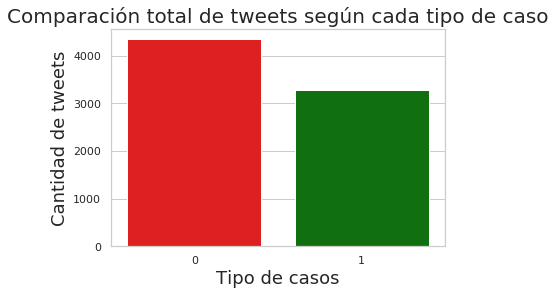

In [12]:
g = sns.barplot(x=target_total.index, y=target_total.values, orient='v', palette=['red','green'])
g.set_title(u"Comparación total de tweets según cada tipo de caso", fontsize=20)
g.set_xlabel(u"Tipo de casos", fontsize=18)
g.set_ylabel(u"Cantidad de tweets", fontsize=18)

Acá podemos ver que del total de tweets que tenemos en el dataframe el 57% de los tweets son de casos no reales y el 43% son de casos reales

### Analizamos los largos de cada tweet

In [13]:
con_len_tweets = train[['id','text','target']].copy()
con_len_tweets['len'] = con_len_tweets['text'].str.len()
con_len_tweets

,id,text,target,len
0,1,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,Forest fire near La Ronge Sask. Canada,1,38
2,5,All residents asked to 'shelter in place' are ...,1,133
3,6,"13,000 people receive #wildfires evacuation or...",1,65
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,I'm on top of the hill and I can see a fire in...,1,59
8,14,There's an emergency evacuation happening now ...,1,79
9,15,I'm afraid that the tornado is coming to our a...,1,52


Sabemos que cada tweet tiene un maximo de 280 caracteres

In [14]:
con_len_tweets['len'].describe()

count               7,613.00
mean                  101.34
std                    33.99
min                     7.00
25%                    78.00
50%                   107.00
75%                   134.00
max                   163.00
Name: len, dtype: float64

Podemos ver que el promedio de longitud de todos los tweets es aproximadamente de 101 caracteres.

Podemos ver que lso tweets que tienen entre aproximadamente 80 caracteres y 150 son en los que predominan los casos reales, en cambio cuando es menor a 75 caracteres y mayor a 150 caracteres la mayoría de tweets son de casos no reales

Text(0,0.5,u'Densidad de tweets')

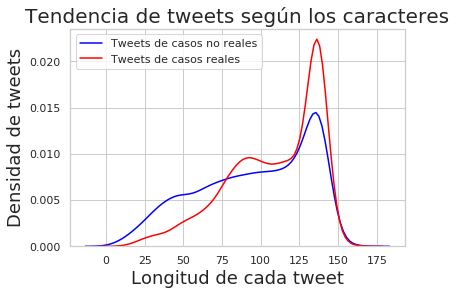

In [15]:
g = sns.distplot(con_len_tweets[con_len_tweets['target'] == 0]['len'], color='blue', label='Tweets de casos no reales', hist=False)
g = sns.distplot(con_len_tweets[con_len_tweets['target'] == 1]['len'], color='red', label='Tweets de casos reales', hist=False)

g.set_title(u"Tendencia de tweets según los caracteres", fontsize=20)
g.set_xlabel(u"Longitud de cada tweet", fontsize=18)
g.set_ylabel(u"Densidad de tweets", fontsize=18)

Analisis de las palabras mas frecuentes en todos los tweets

In [16]:
tweets=train.loc[:,['text']]['text'].transform(lambda palabras: palabras.lower()).value_counts()
tweets

11-year-old boy charged with manslaughter of toddler: report: an 11-year-old boy has been charged with manslaughter over the fatal sh...          10
#bestnaijamade: 16yr old pkk suicide bomber who detonated bomb in ... http://t.co/ksawlyux02 bestnaijamade bestnaijamade bestnaijamade beâã_     6
the prophet (peace be upon him) said 'save yourself from hellfire even if it is by giving half a date in charity.'                                 6
he came to a land which was engulfed in tribal war and turned it into a land of peace i.e. madinah. #prophetmuhammad #islam                        6
madhya pradesh train derailment: village youth saved many lives                                                                                    5
that horrible sinking feeling when youâãâªve been at home on your phone for a while and you realise its been on 3g this whole time               5
to fight bioterrorism sir.                                                                                

In [17]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(tweets))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ImportError: No module named wordcloud

Saco la cantidad de palabras usadas por tweet

In [18]:
words = train[['id','text','target']].copy()
words['cant_palabras'] = words['text'].apply(lambda x: len(x.split()))
words

,id,text,target,cant_palabras
0,1,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,Forest fire near La Ronge Sask. Canada,1,7
2,5,All residents asked to 'shelter in place' are ...,1,22
3,6,"13,000 people receive #wildfires evacuation or...",1,8
4,7,Just got sent this photo from Ruby #Alaska as ...,1,16
5,8,#RockyFire Update => California Hwy. 20 closed...,1,18
6,10,#flood #disaster Heavy rain causes flash flood...,1,14
7,13,I'm on top of the hill and I can see a fire in...,1,15
8,14,There's an emergency evacuation happening now ...,1,12
9,15,I'm afraid that the tornado is coming to our a...,1,10


Text(0.5,0,'Palabras por tweets')

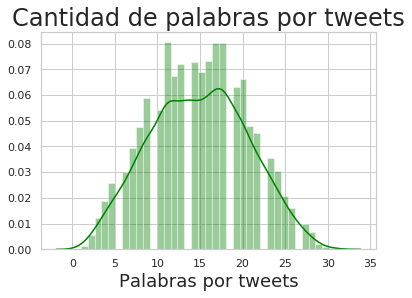

In [19]:
g = sns.distplot(words['cant_palabras'], color="green")
g.set_title("Cantidad de palabras por tweets", fontsize=24)
g.set_xlabel("Palabras por tweets", fontsize=18)

El total de registro de tweets es de 7613. Me fijo la localizaciones de cada tweets

In [20]:
# Saco la localización de cada tweet
localizacion = train['location'].value_counts().sort_values(ascending=False)
#localizacion = localizacion.rename(columns={'location': "total", 'index' : 'location'})
localizacion

USA                                                      104
New York                                                  71
United States                                             50
London                                                    45
Canada                                                    29
Nigeria                                                   28
UK                                                        27
Los Angeles, CA                                           26
India                                                     24
Mumbai                                                    22
Washington, DC                                            21
Kenya                                                     20
Worldwide                                                 19
Australia                                                 18
Chicago, IL                                               18
California                                                17
Everywhere              

Vemos que el total de localizaciones es de 3341 tweets sobre los 7613 totales. Por lo que solo el 43% de los tweets tienen localización.

Text(0,0.5,u'Localizaci\xf3n')

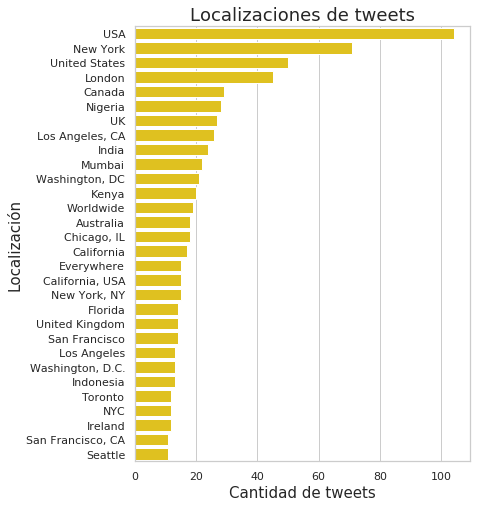

In [21]:
# Vamos a trabajar con las primeras 30 localizaciones
localizacion = localizacion.head(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x=localizacion.values, y=localizacion.index, orient='h', color='gold')
g.set_title(u"Localizaciones de tweets", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Localización", fontsize=15)

Separo los tweets con localizaciones dependiendo su target

In [22]:
localization_1 = train[train['target']==1]
localization_0 = train[train['target']==0]

localization_1

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [23]:
localization_0

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
20,31,NaN,NaN,this is ridiculous....,0
21,32,NaN,NaN,London is cool ;),0
22,33,NaN,NaN,Love skiing,0
23,34,NaN,NaN,What a wonderful day!,0
24,36,NaN,NaN,LOOOOOOL,0


In [24]:
sum_location_1 = localization_1['location'].value_counts().reset_index()
sum_location_1.rename(columns={"location":"Tweets reales","index":"location"},inplace=True)
sum_location_1

,location,Tweets reales
0,USA,67
1,United States,27
2,Nigeria,22
3,India,20
4,Mumbai,19
5,New York,16
6,London,16
7,UK,16
8,"Washington, DC",15
9,Canada,13


In [25]:
sum_location_0 = localization_0['location'].value_counts().reset_index()
sum_location_0.rename(columns={"location":"Tweets no reales","index":"location"},inplace=True)
sum_location_0

,location,Tweets no reales
0,New York,55
1,USA,37
2,London,29
3,United States,23
4,"Los Angeles, CA",18
5,Canada,16
6,Kenya,15
7,Everywhere,12
8,Florida,11
9,UK,11


In [26]:
tabla = sum_location_0.set_index('location').join(sum_location_1.set_index('location'))
tabla

,Tweets no reales,Tweets reales
location,,
New York,55,16.00
USA,37,67.00
London,29,16.00
United States,23,27.00
"Los Angeles, CA",18,8.00
Canada,16,13.00
Kenya,15,5.00
Everywhere,12,3.00
Florida,11,3.00


Notamos que de las primeras 20 localizaciones donde hay tweets, predomina mucho más los tweets falsos. En las localizaciones que los tweets reales son mayor que los falsos es cuando las localizaciones son paises y no ciudades

Text(0.5,0,'Cantidad de Tweets')

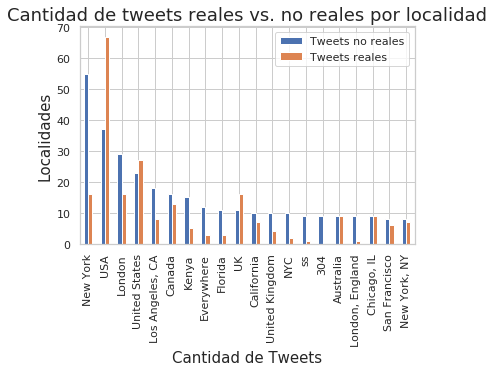

In [27]:
primeros20=tabla.head(20)
g=primeros20.plot.bar()
g.set_title("Cantidad de tweets reales vs. no reales por localidad", fontsize=18)
g.set_ylabel("Localidades", fontsize=15)
g.set_xlabel("Cantidad de Tweets", fontsize=15)

In [28]:
keyword=train[['keyword','target']].copy()

Analizo la cantidad de valores nulos que se tienen en la columna keywords

In [29]:
keyword['keyword'].isna().sum()

61

In [30]:
keyword.dropna(axis=0,inplace=True)

In [31]:
keyword.shape

(7552, 2)

Se eliminaron los keywords nulos, hacemos un análisis de la cantidad de tweets por keyword

In [32]:
keyword['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
harm                     41
damage                   41
body%20bags              41
evacuate                 40
outbreak                 40
twister                  40
siren                    40
fear                     40
windstorm                40
collided                 40
derailment               39
collision                39
earthquake               39
wrecked                  39
famine                   39
weapons                  39
sunk                     39
whirlwind                39
explosion                39
hellfire                 39
wreckage                 39
flames                   39
weapon                   39
sinkhole                 39
injury                   38
derailed                 38
                         ..
trauma                   31
terrorist                31
obliterated              31
catastrophic             30
survivors           

Como puede verse, hay 221 keywords únicos. Nos interesa saber cuáles son los 30 keywords que poseen la mayor cantidad de tweets

In [33]:
top_30_keywords=keyword['keyword'].value_counts().sort_values(ascending=False).head(30)

Text(0,0.5,u'Keywords')

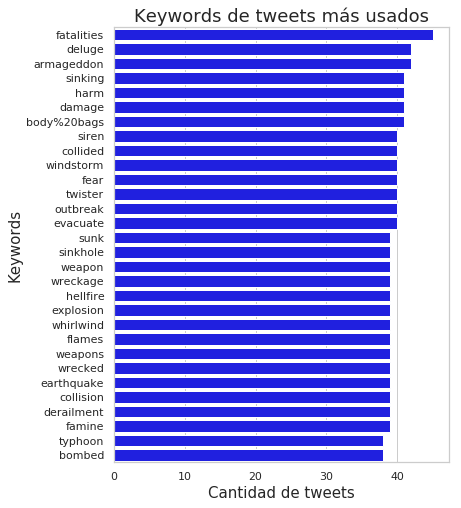

In [34]:
plt.figure(figsize=(6,8))
g = sns.barplot(x=top_30_keywords.values, y=top_30_keywords.index, orient='h', color='blue')
g.set_title(u"Keywords de tweets más usados", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

In [35]:
low_30_keywords=keyword['keyword'].value_counts().sort_values(ascending=False).tail(30)

Text(0,0.5,u'Keywords')

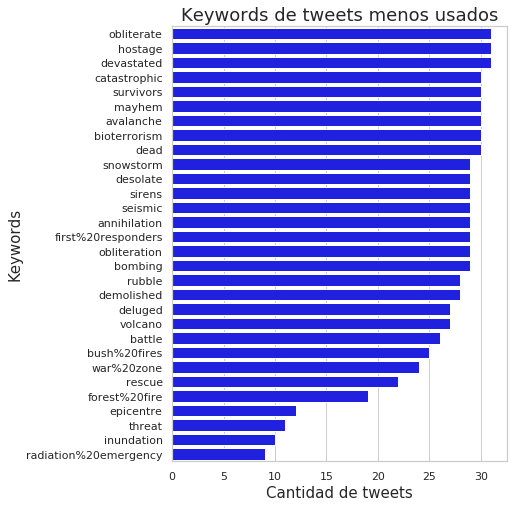

In [36]:
plt.figure(figsize=(6,8))
g = sns.barplot(x=low_30_keywords.values, y=low_30_keywords.index, orient='h', color='blue')
g.set_title(u"Keywords de tweets menos usados", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

Ahora que tenemos una idea de la cantidad de tweets por su keyword asociado, analizamos cuántos de esos tweets son verdaderos

In [37]:
keyword=keyword.groupby('keyword').agg('sum').sort_values('target',ascending=False)
keyword.rename(columns={"target":"cantidad de tweets"},inplace=True)

In [38]:
keyword.reset_index(inplace=True)

In [39]:
top_30_key_true=keyword.head(30)
top_30_key_true

,keyword,cantidad de tweets
0,derailment,39
1,wreckage,39
2,outbreak,39
3,typhoon,37
4,debris,37
5,oil%20spill,37
6,suicide%20bomb,32
7,rescuers,32
8,suicide%20bombing,32
9,evacuated,32


Text(0,0.5,u'Keywords')

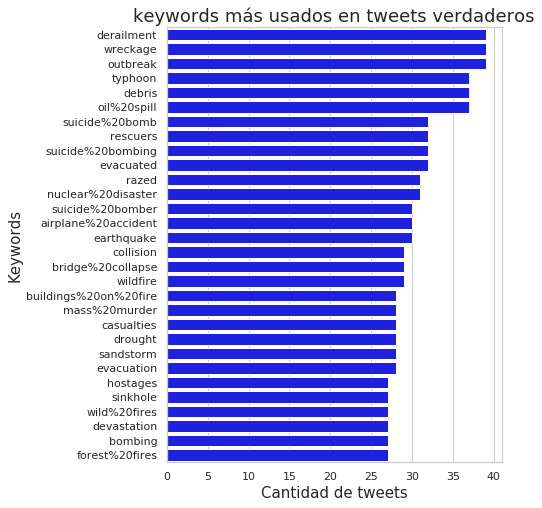

In [40]:
top_30_key_true=keyword.head(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x="cantidad de tweets", y="keyword", data=top_30_key_true, orient='h', color='blue')
g.set_title(u"keywords más usados en tweets verdaderos", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

Text(0,0.5,u'Keywords')

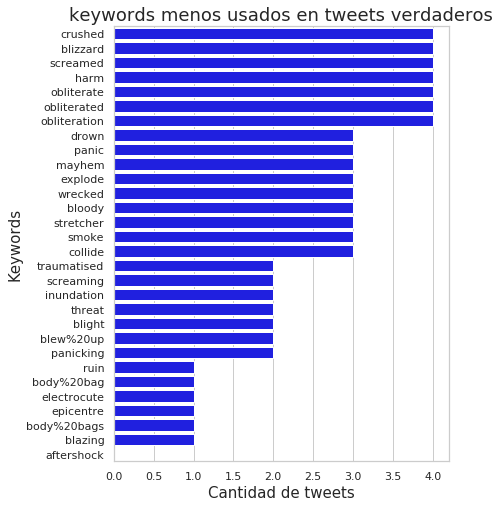

In [41]:
low_30_key_true=keyword.tail(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x="cantidad de tweets", y="keyword", data=low_30_key_true, orient='h', color='blue')
g.set_title(u"keywords menos usados en tweets verdaderos", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

In [42]:
keyword_y_location=train[['keyword','location']].copy()
print(keyword_y_location['keyword'].isna().sum())
print(keyword_y_location['location'].isna().sum())

61
2533


In [43]:
#Elimino en donde ambas lineas tiene Nan en la columan keyword, por lo que quedan keyword activas pero sin localización exacta
keyword_y_location.dropna(how='any',inplace=True)
print(keyword_y_location['keyword'].isna().sum())
print(keyword_y_location['location'].isna().sum())

0
0


In [44]:
keyword_y_location['actividad']=1

In [45]:
keyword_y_location['keyword'].value_counts()

collision                36
whirlwind                33
armageddon               32
fatalities               32
emergency%20plan         31
derailed                 31
sandstorm                31
flames                   31
outbreak                 31
inundated                30
desolation               30
upheaval                 30
harm                     30
earthquake               30
danger                   30
damage                   30
collapse                 29
displaced                29
ablaze                   29
flood                    29
evacuation               29
airplane%20accident      29
rainstorm                29
deluge                   29
weapons                  29
buildings%20on%20fire    29
sinkhole                 29
flattened                29
attacked                 28
deaths                   28
                         ..
suicide%20bombing        18
electrocuted             18
annihilation             18
exploded                 18
military            

In [46]:
#Agrupo por keyword y por localización y sumo el total de repeticiones
keyword_y_location_sum = keyword_y_location.groupby(['keyword','location'],as_index=False)['actividad'].sum()
keyword_y_location_sum

,keyword,location,actividad
0,ablaze,AFRICA,1
1,ablaze,Abuja,1
2,ablaze,Anaheim,1
3,ablaze,Barbados,1
4,ablaze,Birmingham,2
5,ablaze,"Calgary, AB",1
6,ablaze,"Concord, CA",1
7,ablaze,"Edmonton, Alberta - Treaty 6",1
8,ablaze,England.,1
9,ablaze,Est. September 2012 - Bristol,1


Text(30.5,0.5,'Keyword')

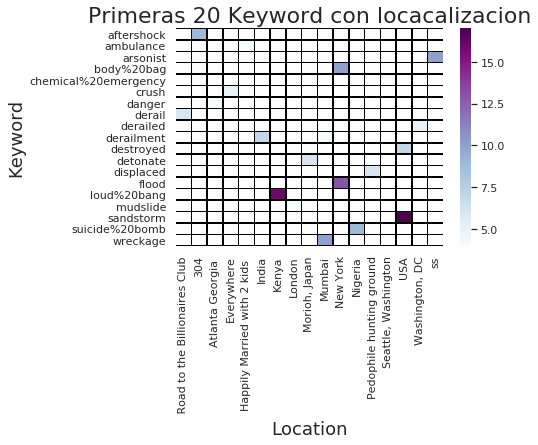

In [47]:
r = keyword_y_location_sum.sort_values(by=['actividad'],ascending=False)
for_heatmap= r.head(20).pivot_table(index='keyword', columns='location', values='actividad', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu",linecolor='black') # annot=True
g.set_title("Primeras 20 Keyword con locacalizacion", fontsize=22)
g.set_xlabel("Location",fontsize=18)
g.set_ylabel("Keyword", fontsize=18)

Podemos ver que solo en la localización USA hay dos palabras con dentro del top 20 de keywords. También se puede ver que hay localizaciones que no son ciudades o países, y tienen un numero bajo de repeticiones de la misma keyword, por lo que podemos pensar que es la misma persona o gente cercana a esta.

In [48]:
#un analisis del valor de veracidad de cada palabra
#para cada palabra en cada texto, ver cuantos tweets verdaderos tiene asociada
#y en cuantos tweets aparece, como si de una tupla (palabra, (verdaderos,totales))
#de ahi saco una especie de valor de veracidad verdaderos/totales 
#despues puedo eliminar aquellas que no tengan una cierta cantidad de apariciones 
#totales

In [49]:
dicc_palabras={}
def procesar_texto_por_palabra(texto):
    lista_palabras=texto.split()
    for palabra in lista_palabras:
        palabra_lower=palabra.lower()
        cant_apariciones=dicc_palabras.get(palabra_lower,(-1,-1))[1]
        if(cant_apariciones==-1):
            dicc_palabras[palabra_lower]=(0,1)
        else:
            lista_aux=list(dicc_palabras[palabra_lower])
            lista_aux[1]+=1
            tupla=tuple(lista_aux)
            dicc_palabras[palabra_lower]=tupla
            
   

In [ ]:
train['text'].apply(procesar_texto_por_palabra)

In [51]:
def procesar_texto_por_verdaderos(texto):
    lista_palabras=texto.split()
    for palabra in lista_palabras:
        palabra_lower=palabra.lower()
        cant_apariciones_verdaderas=dicc_palabras.get(palabra_lower,(-1,-1))[0]
        if(cant_apariciones_verdaderas==-1):
            lista_aux=list(dicc_palabras[palabra_lower])
            lista_aux[0]=1
            tupla=tuple(lista_aux)
            dicc_palabras[palabra_lower]=tupla
        else:
            lista_aux=list(dicc_palabras[palabra_lower])
            lista_aux[0]+=1
            tupla=tuple(lista_aux)
            dicc_palabras[palabra_lower]=tupla
            

In [ ]:
train[train['target']==1]['text'].apply(procesar_texto_por_verdaderos)

In [53]:
lista_llaves=dicc_palabras.keys()

In [54]:
#vemos la cantidad de palabras únicas que hay en el archivo


In [83]:
#nos fijamos la cantidad de palabras únicas que hay en los tweets
len(lista_llaves)

27983

In [84]:
dicc_coeficiente_verdad={}
for llave in lista_llaves:
    ap_verdaderas=dicc_palabras[llave][0]
    ap_totales=dicc_palabras[llave][1]
    coeficiente=float(ap_verdaderas)/float(ap_totales)
    dicc_coeficiente_verdad[llave]=(coeficiente,(ap_verdaderas,ap_totales))

In [85]:
#este ultimo diccionario tiene una forma clave: (valor de verdad ,(apariciones verdaderas, apariciones totales))

In [86]:
lista_coeficiente=[]
lista_apariciones_totales=[]
lista_apariciones_verdaderas=[]
for llave in lista_llaves:
    lista_apariciones_verdaderas.append(dicc_palabras[llave][0])
    lista_apariciones_totales.append(dicc_palabras[llave][1])
    lista_coeficiente.append(dicc_coeficiente_verdad[llave][0])
coeficiente_a_df={}
coeficiente_a_df['palabra']=lista_llaves
coeficiente_a_df['apariciones totales']=lista_apariciones_totales
coeficiente_a_df['apariciones verdaderas']=lista_apariciones_verdaderas
coeficiente_a_df['coeficiente de verdad']=lista_coeficiente

In [87]:
df_coeficiente_de_verdad=pd.DataFrame(coeficiente_a_df).sort_values('coeficiente de verdad',ascending=False)


In [88]:
#quiero información acerca de la cantidad de apariciones de cada palabra de texto
#de manera de eliminar outliers en mi informacion
df_coeficiente_de_verdad['apariciones totales'].describe()

count              27,983.00
mean                    4.05
std                    37.58
min                     1.00
25%                     1.00
50%                     1.00
75%                     2.00
max                 3,207.00
Name: apariciones totales, dtype: float64

In [89]:
#podemos ver entonces que la distribución de los textos es poco uniforme, teniendo la mayor cantidad 
#de los mismos una tasa de aparición de uno o dos elementos. Esto no me sirve para el calculo de coeficiente
#porque es un tamaño de muestra demasiado chico. voy a dropear aquellas palabras que no cumplan con un 
#cierto numero de apariciones

In [90]:
palabras_mas_de_100_apariciones=df_coeficiente_de_verdad[df_coeficiente_de_verdad['apariciones totales']>100]

In [91]:
top30_coef_de_verdad=palabras_mas_de_100_apariciones.head(30)

Text(0,0.5,u'Palabra')

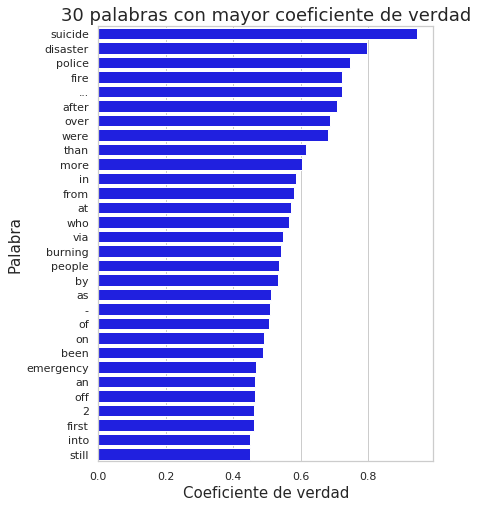

In [92]:
plt.figure(figsize=(6,8))
g = sns.barplot(x="coeficiente de verdad", y="palabra", data=top30_coef_de_verdad, orient='h', color='blue')
g.set_title(u"30 palabras con mayor coeficiente de verdad", fontsize=18)
g.set_xlabel(u"Coeficiente de verdad", fontsize=15)
g.set_ylabel(u"Palabra", fontsize=15)

In [93]:
low30_coef_de_verdad=palabras_mas_de_100_apariciones.tail(30)

Text(0,0.5,u'Palabra')

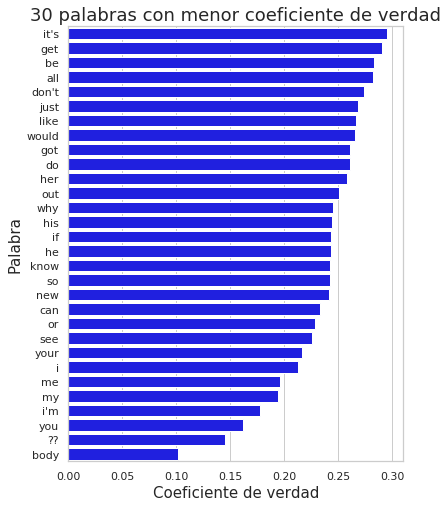

In [94]:
plt.figure(figsize=(6,8))
g = sns.barplot(x="coeficiente de verdad", y="palabra", data=low30_coef_de_verdad, orient='h', color='blue')
g.set_title(u"30 palabras con menor coeficiente de verdad", fontsize=18)
g.set_xlabel(u"Coeficiente de verdad", fontsize=15)
g.set_ylabel(u"Palabra", fontsize=15)